<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Cassificacao_Imagens_Alpaca_Keras_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 03/07/2021

In [155]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd
import cv2  #biblioteca que trabalha com imagens
import random
import zipfile  #para trabalhar com arquivos zip
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.preprocessing import image

In [156]:
#Importando os arquivos que estão no googledrive
!gdown --id 1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH

Downloading...
From: https://drive.google.com/uc?id=1X7ZqP9uAwaOAhv9j9CsI0KKlCjkoX3YH
To: /content/Animals.zip
122MB [00:01, 120MB/s]


In [157]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [158]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Animals.zip']  #importando os arquivos
Image_Size=300
Image_Name=[]  #lista em branco
X_Original=[]  
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for Name in f.namelist():
          Image_Name.append(Name)
          X_Original.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size))) #redimensionando

In [159]:
#Recuperando o nome com 4 primeiras letras
Y_Names = []
for yy in Image_Name:
  Name = yy[0]+yy[1]+yy[2]+yy[3]
  Y_Names.append(Name)  
  #print(y_Names)

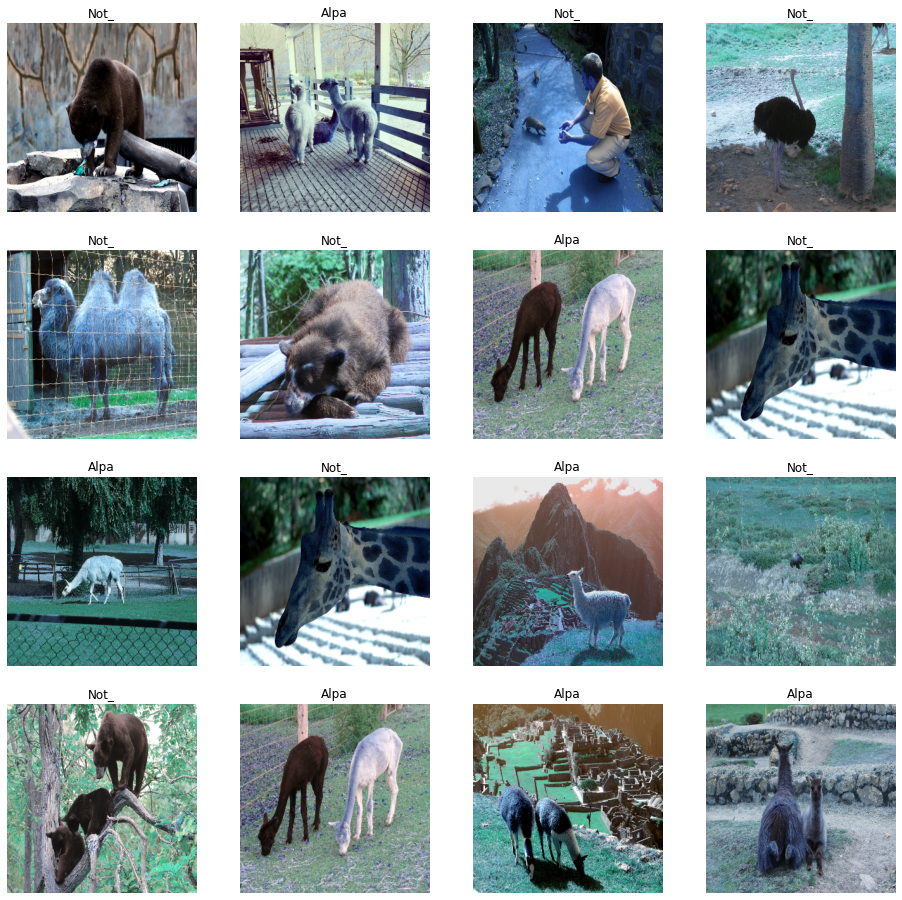

In [160]:
#Plotando algumas imagens em preto e branco com seus respectivos nomes (4 primeiras letras)
num = len(Y_Names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(X_Original[kk])
  plt.title(Y_Names[kk])
  plt.axis("off")

In [161]:
Unique_List = []      #gera uma lista com as classes únicas
for yy in Y_Names:
  if yy not in Unique_List:
    Unique_List.append(yy)

In [162]:
n = len(Unique_List)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in Y_Names:   #Loop com nome e armazena em y o nome dessas classes unicas com um vetor om os numeros 0, 1, 2,3
  for i in range(n):
    if(yy == Unique_List[i]):
      Y.append(i)

In [163]:
Unique_List

['Alpa', 'Not_']

In [164]:
DATASET_SIZE = len(Y_Names)
Index = range(DATASET_SIZE)
Image_Size = 250
Num_Range = DATASET_SIZE

In [165]:
#Separando os dados em 80% de treino e 20% de teste e misturando os dados
Index_Train, Index_Test= train_test_split(Index,test_size=0.40, shuffle=True, random_state=3)

In [166]:
X_Train = []
Y_Train = []
for II in Index_Train:
  Name = Image_Name[II]
  X_Train.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size)))
  Y_Train.append(Y[II])

In [167]:
X_Test= []
Y_Test = []
for II in Index_Test:
  Name = Image_Name[II]
  X_Test.append(cv2.resize(cv2.imread(Name),(Image_Size,Image_Size)))
  Y_Test.append(Y[II])

In [168]:
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
K = len(set(Y_Train))
X_Train = X_Train.reshape(-1, Image_Size, Image_Size, 3) / 255.0 #escalonamento para imagens coloridas 
Y_Train = Y_Train.astype(np.int32)
Y_Train = ynindicator(Y_Train)

X_Test = np.array(X_Test )
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape(-1, Image_Size, Image_Size, 3) / 255.0
Y_Test = Y_Test.astype(np.int32)
Y_Test = ynindicator(Y_Test)

In [169]:

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Image_Size, Image_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=62, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

'''model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())'''



model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [170]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_Train, Y_Train, validation_data = (X_Test,Y_Test), epochs=50, batch_size=50)
print("Returned:", r)

Epoch 1/50
4/4 [==============================] - 2s 322ms/step - loss: 61.6904 - accuracy: 0.4753 - val_loss: 5.1280 - val_accuracy: 0.5344
Epoch 2/50
4/4 [==============================] - 1s 159ms/step - loss: 37.7979 - accuracy: 0.5119 - val_loss: 5.0645 - val_accuracy: 0.5344
Epoch 3/50
4/4 [==============================] - 1s 156ms/step - loss: 26.3445 - accuracy: 0.6256 - val_loss: 2.9618 - val_accuracy: 0.4656
Epoch 4/50
4/4 [==============================] - 1s 167ms/step - loss: 19.4733 - accuracy: 0.4983 - val_loss: 6.3005 - val_accuracy: 0.5344
Epoch 5/50
4/4 [==============================] - 1s 155ms/step - loss: 13.7881 - accuracy: 0.6405 - val_loss: 1.5842 - val_accuracy: 0.6031
Epoch 6/50
4/4 [==============================] - 1s 157ms/step - loss: 13.6487 - accuracy: 0.5896 - val_loss: 6.3254 - val_accuracy: 0.5267
Epoch 7/50
4/4 [==============================] - 1s 159ms/step - loss: 9.3284 - accuracy: 0.6555 - val_loss: 2.4501 - val_accuracy: 0.5802
Epoch 8/50
4/4

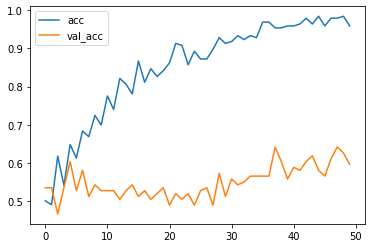

In [171]:
# plot some data
plt.plot(r.history['accuracy'], label='acc') #numero total de acertos pelo total de imagens
plt.plot(r.history['val_accuracy'], label='val_acc') #
plt.legend()
plt.show()

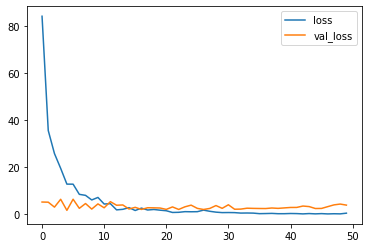

In [172]:
# plot some data
plt.plot(r.history['loss'], label='loss') #medida de erro 
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [173]:
ynew = model.predict_classes(X_Test)
N_test = len(ynew)
y_resp = (model.predict(X_Test) > 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [174]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_Test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1]


In [175]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [177]:
target_names = ['Alpaca', 'Not_Alpaca']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.28      0.39        61
           1       0.58      0.87      0.70        70

    accuracy                           0.60       131
   macro avg       0.62      0.58      0.54       131
weighted avg       0.61      0.60      0.55       131

